# 1. Importing Library and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('drive/MyDrive/DSLS/DS Mini Project/aggregate_alerts.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Data Exploration

In [3]:
df.shape

(112399, 10)

In [4]:
df.head()

,Unnamed: 0,id,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,type,avg_location,total_records,date
0,0,5930351,2022-07-06 00:00:00.000,32.73,KOTA BANDUNG,Batununggal Indah 2,WEATHERHAZARD,"[107.62634049999998, -6.962361499999998]",120,2022-07-06
1,1,5930352,2022-07-06 00:00:00.000,32.73,KOTA BANDUNG,Cibaduyut Raya,ROAD_CLOSED,"[107.59526000000004, -6.9472129999999925]",60,2022-07-06
2,2,5930353,2022-07-06 00:00:00.000,32.73,KOTA BANDUNG,Gerbang Tol Gede Bage,ROAD_CLOSED,"[107.69057999999981, -6.959956500000006]",120,2022-07-06
3,3,5930354,2022-07-06 00:00:00.000,32.73,KOTA BANDUNG,Jenderal Ahmad Yani,WEATHERHAZARD,"[107.65976500000006, -6.902228999999994]",60,2022-07-06
4,4,5930355,2022-07-06 00:00:00.000,32.73,KOTA BANDUNG,KH Wahid Hasyim,ROAD_CLOSED,"[107.58966274999973, -6.945608999999994]",240,2022-07-06


In [5]:
df.info

<bound method DataFrame.info of         Unnamed: 0       id                     time  \
0                0  5930351  2022-07-06 00:00:00.000   
1                1  5930352  2022-07-06 00:00:00.000   
2                2  5930353  2022-07-06 00:00:00.000   
3                3  5930354  2022-07-06 00:00:00.000   
4                4  5930355  2022-07-06 00:00:00.000   
...            ...      ...                      ...   
112394      112394  6217721  2022-09-04 22:00:00.000   
112395      112395  6217722  2022-09-04 23:00:00.000   
112396      112396  6217723  2022-09-04 23:00:00.000   
112397      112397  6221963  2022-09-06 00:00:00.000   
112398      112398  6221964  2022-09-06 00:00:00.000   

        kemendagri_kabupaten_kode kemendagri_kabupaten_nama  \
0                           32.73              KOTA BANDUNG   
1                           32.73              KOTA BANDUNG   
2                           32.73              KOTA BANDUNG   
3                           32.73          

In [6]:
df.describe()

,Unnamed: 0,id,kemendagri_kabupaten_kode,total_records
count,112399.000000,1.123990e+05,112399.000000,112399.000000
mean,56199.000000,6.080749e+06,32.743388,59.303348
std,32446.940791,8.423547e+04,0.015716,67.262969
min,0.000000,5.930177e+06,32.710000,1.000000
25%,28099.500000,6.008362e+06,32.730000,18.000000
50%,56199.000000,6.085291e+06,32.750000,38.000000
75%,84298.500000,6.153358e+06,32.750000,60.000000
max,112398.000000,6.221964e+06,32.790000,915.000000


In [7]:
df.isnull().sum()

Unnamed: 0                      0
id                              0
time                            0
kemendagri_kabupaten_kode       0
kemendagri_kabupaten_nama       0
street                       7606
type                            0
avg_location                    0
total_records                   0
date                            0
dtype: int64

In [42]:
df.dtypes

Unnamed: 0                     int64
id                             int64
time                          object
kemendagri_kabupaten_kode    float64
kemendagri_kabupaten_nama     object
street                        object
type                          object
avg_location                  object
total_records                  int64
date                          object
dtype: object

In [8]:
df1 = df.drop(['Unnamed: 0', 'id'], axis=1)

In [9]:
col = list(df1.columns.values)
print(col)

['time', 'kemendagri_kabupaten_kode', 'kemendagri_kabupaten_nama', 'street', 'type', 'avg_location', 'total_records', 'date']


In [10]:
df1.head()

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,type,avg_location,total_records,date
0,2022-07-06 00:00:00.000,32.73,KOTA BANDUNG,Batununggal Indah 2,WEATHERHAZARD,"[107.62634049999998, -6.962361499999998]",120,2022-07-06
1,2022-07-06 00:00:00.000,32.73,KOTA BANDUNG,Cibaduyut Raya,ROAD_CLOSED,"[107.59526000000004, -6.9472129999999925]",60,2022-07-06
2,2022-07-06 00:00:00.000,32.73,KOTA BANDUNG,Gerbang Tol Gede Bage,ROAD_CLOSED,"[107.69057999999981, -6.959956500000006]",120,2022-07-06
3,2022-07-06 00:00:00.000,32.73,KOTA BANDUNG,Jenderal Ahmad Yani,WEATHERHAZARD,"[107.65976500000006, -6.902228999999994]",60,2022-07-06
4,2022-07-06 00:00:00.000,32.73,KOTA BANDUNG,KH Wahid Hasyim,ROAD_CLOSED,"[107.58966274999973, -6.945608999999994]",240,2022-07-06


In [11]:
df1.dtypes

time                          object
kemendagri_kabupaten_kode    float64
kemendagri_kabupaten_nama     object
street                        object
type                          object
avg_location                  object
total_records                  int64
date                          object
dtype: object

In [12]:
alert = df1.groupby(["type"])[["type"]].count()
alert.rename(columns={"type": "count"}, inplace=True)
alert.reset_index(inplace=True)
alert = alert.reset_index(drop=True).rename_axis(None, axis=1)
alert = alert.sort_values(by="count", ascending=False)
alert

,type,count
1,JAM,58491
3,WEATHERHAZARD,32929
2,ROAD_CLOSED,18848
0,ACCIDENT,2131


In [13]:
import plotly.express as px
fig = px.bar(alert, 
             x="type", y="count", 
             color="type",
             text="count", 
             title="Count per Category")
fig.show()

# 3. Data Preprocessing

In [14]:
df1['time'] = pd.to_datetime(df1['time'])

In [15]:
df1['kemendagri_kabupaten_kode'] = df['kemendagri_kabupaten_kode'].astype(str)

In [16]:
df1.head()

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,type,avg_location,total_records,date
0,2022-07-06,32.73,KOTA BANDUNG,Batununggal Indah 2,WEATHERHAZARD,"[107.62634049999998, -6.962361499999998]",120,2022-07-06
1,2022-07-06,32.73,KOTA BANDUNG,Cibaduyut Raya,ROAD_CLOSED,"[107.59526000000004, -6.9472129999999925]",60,2022-07-06
2,2022-07-06,32.73,KOTA BANDUNG,Gerbang Tol Gede Bage,ROAD_CLOSED,"[107.69057999999981, -6.959956500000006]",120,2022-07-06
3,2022-07-06,32.73,KOTA BANDUNG,Jenderal Ahmad Yani,WEATHERHAZARD,"[107.65976500000006, -6.902228999999994]",60,2022-07-06
4,2022-07-06,32.73,KOTA BANDUNG,KH Wahid Hasyim,ROAD_CLOSED,"[107.58966274999973, -6.945608999999994]",240,2022-07-06


In [17]:
df1['year'] = df1['time'].dt.year
df1['month'] = df1['time'].dt.month
df1['week'] = df1['time'].dt.week
df1['day'] = df1['time'].dt.day
df1['day_of_week'] = df1['time'].dt.dayofweek
df1['hour'] = df1['time'].dt.hour
df1['minute'] = df1['time'].dt.minute
df1.head()

<ipython-input-17-0373d983066d>:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,type,avg_location,total_records,date,year,month,week,day,day_of_week,hour,minute
0,2022-07-06,32.73,KOTA BANDUNG,Batununggal Indah 2,WEATHERHAZARD,"[107.62634049999998, -6.962361499999998]",120,2022-07-06,2022,7,27,6,2,0,0
1,2022-07-06,32.73,KOTA BANDUNG,Cibaduyut Raya,ROAD_CLOSED,"[107.59526000000004, -6.9472129999999925]",60,2022-07-06,2022,7,27,6,2,0,0
2,2022-07-06,32.73,KOTA BANDUNG,Gerbang Tol Gede Bage,ROAD_CLOSED,"[107.69057999999981, -6.959956500000006]",120,2022-07-06,2022,7,27,6,2,0,0
3,2022-07-06,32.73,KOTA BANDUNG,Jenderal Ahmad Yani,WEATHERHAZARD,"[107.65976500000006, -6.902228999999994]",60,2022-07-06,2022,7,27,6,2,0,0
4,2022-07-06,32.73,KOTA BANDUNG,KH Wahid Hasyim,ROAD_CLOSED,"[107.58966274999973, -6.945608999999994]",240,2022-07-06,2022,7,27,6,2,0,0


In [18]:
df1 = df1.drop(['date'], axis=1)
df1.head()

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,type,avg_location,total_records,year,month,week,day,day_of_week,hour,minute
0,2022-07-06,32.73,KOTA BANDUNG,Batununggal Indah 2,WEATHERHAZARD,"[107.62634049999998, -6.962361499999998]",120,2022,7,27,6,2,0,0
1,2022-07-06,32.73,KOTA BANDUNG,Cibaduyut Raya,ROAD_CLOSED,"[107.59526000000004, -6.9472129999999925]",60,2022,7,27,6,2,0,0
2,2022-07-06,32.73,KOTA BANDUNG,Gerbang Tol Gede Bage,ROAD_CLOSED,"[107.69057999999981, -6.959956500000006]",120,2022,7,27,6,2,0,0
3,2022-07-06,32.73,KOTA BANDUNG,Jenderal Ahmad Yani,WEATHERHAZARD,"[107.65976500000006, -6.902228999999994]",60,2022,7,27,6,2,0,0
4,2022-07-06,32.73,KOTA BANDUNG,KH Wahid Hasyim,ROAD_CLOSED,"[107.58966274999973, -6.945608999999994]",240,2022,7,27,6,2,0,0


In [19]:
df1['avg_location'] = df1['avg_location'].str.replace(r"[\[\]]", '')
df1.head()

<ipython-input-19-b7ab42759dc4>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,type,avg_location,total_records,year,month,week,day,day_of_week,hour,minute
0,2022-07-06,32.73,KOTA BANDUNG,Batununggal Indah 2,WEATHERHAZARD,"107.62634049999998, -6.962361499999998",120,2022,7,27,6,2,0,0
1,2022-07-06,32.73,KOTA BANDUNG,Cibaduyut Raya,ROAD_CLOSED,"107.59526000000004, -6.9472129999999925",60,2022,7,27,6,2,0,0
2,2022-07-06,32.73,KOTA BANDUNG,Gerbang Tol Gede Bage,ROAD_CLOSED,"107.69057999999981, -6.959956500000006",120,2022,7,27,6,2,0,0
3,2022-07-06,32.73,KOTA BANDUNG,Jenderal Ahmad Yani,WEATHERHAZARD,"107.65976500000006, -6.902228999999994",60,2022,7,27,6,2,0,0
4,2022-07-06,32.73,KOTA BANDUNG,KH Wahid Hasyim,ROAD_CLOSED,"107.58966274999973, -6.945608999999994",240,2022,7,27,6,2,0,0


In [20]:
df1[['lat', 'long']] = df1['avg_location'].str.split(',', expand=True)
df1[['lat', 'long']] = df1[['lat', 'long']].astype(float)
df1.head()

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,type,avg_location,total_records,year,month,week,day,day_of_week,hour,minute,lat,long
0,2022-07-06,32.73,KOTA BANDUNG,Batununggal Indah 2,WEATHERHAZARD,"107.62634049999998, -6.962361499999998",120,2022,7,27,6,2,0,0,107.626340,-6.962361
1,2022-07-06,32.73,KOTA BANDUNG,Cibaduyut Raya,ROAD_CLOSED,"107.59526000000004, -6.9472129999999925",60,2022,7,27,6,2,0,0,107.595260,-6.947213
2,2022-07-06,32.73,KOTA BANDUNG,Gerbang Tol Gede Bage,ROAD_CLOSED,"107.69057999999981, -6.959956500000006",120,2022,7,27,6,2,0,0,107.690580,-6.959957
3,2022-07-06,32.73,KOTA BANDUNG,Jenderal Ahmad Yani,WEATHERHAZARD,"107.65976500000006, -6.902228999999994",60,2022,7,27,6,2,0,0,107.659765,-6.902229
4,2022-07-06,32.73,KOTA BANDUNG,KH Wahid Hasyim,ROAD_CLOSED,"107.58966274999973, -6.945608999999994",240,2022,7,27,6,2,0,0,107.589663,-6.945609


In [21]:
df1 = df1.drop(['time', 'avg_location', 'minute','year', 'kemendagri_kabupaten_kode','kemendagri_kabupaten_nama', 'street'], axis=1)

In [22]:
df1

,type,total_records,month,week,day,day_of_week,hour,lat,long
0,WEATHERHAZARD,120,7,27,6,2,0,107.626340,-6.962361
1,ROAD_CLOSED,60,7,27,6,2,0,107.595260,-6.947213
2,ROAD_CLOSED,120,7,27,6,2,0,107.690580,-6.959957
3,WEATHERHAZARD,60,7,27,6,2,0,107.659765,-6.902229
4,ROAD_CLOSED,240,7,27,6,2,0,107.589663,-6.945609
...,...,...,...,...,...,...,...,...,...
112394,ROAD_CLOSED,240,9,35,4,6,22,108.202669,-7.321167
112395,ROAD_CLOSED,60,9,35,4,6,23,108.219800,-7.329317
112396,ROAD_CLOSED,240,9,35,4,6,23,108.202669,-7.321167
112397,ROAD_CLOSED,60,9,36,6,1,0,108.219800,-7.329317


In [23]:
df2 = df1.replace({'type' : { 'ROAD_CLOSED' : 'ROAD_CLOSED/ACCIDENT', 'ACCIDENT' : 'ROAD_CLOSED/ACCIDENT'}})
df2

,type,total_records,month,week,day,day_of_week,hour,lat,long
0,WEATHERHAZARD,120,7,27,6,2,0,107.626340,-6.962361
1,ROAD_CLOSED/ACCIDENT,60,7,27,6,2,0,107.595260,-6.947213
2,ROAD_CLOSED/ACCIDENT,120,7,27,6,2,0,107.690580,-6.959957
3,WEATHERHAZARD,60,7,27,6,2,0,107.659765,-6.902229
4,ROAD_CLOSED/ACCIDENT,240,7,27,6,2,0,107.589663,-6.945609
...,...,...,...,...,...,...,...,...,...
112394,ROAD_CLOSED/ACCIDENT,240,9,35,4,6,22,108.202669,-7.321167
112395,ROAD_CLOSED/ACCIDENT,60,9,35,4,6,23,108.219800,-7.329317
112396,ROAD_CLOSED/ACCIDENT,240,9,35,4,6,23,108.202669,-7.321167
112397,ROAD_CLOSED/ACCIDENT,60,9,36,6,1,0,108.219800,-7.329317


In [24]:
alert = df2.groupby(["type"])[["type"]].count()
alert.rename(columns={"type": "count"}, inplace=True)
alert.reset_index(inplace=True)
alert = alert.reset_index(drop=True).rename_axis(None, axis=1)
alert = alert.sort_values(by="count", ascending=False)
alert

,type,count
0,JAM,58491
2,WEATHERHAZARD,32929
1,ROAD_CLOSED/ACCIDENT,20979


In [25]:
fig = px.bar(alert, 
             x="type", y="count", 
             color="type",
             text="count", 
             title="Count per Category")
fig.show()

In [26]:
data = df2

X = data.drop('type',axis=1)
y = data['type']

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
train_data = X_train
train_data.head()

,total_records,month,week,day,day_of_week,hour,lat,long
12878,30,7,30,31,6,19,107.604260,-6.901426
38806,47,7,28,17,6,14,106.905458,-6.365515
23619,240,8,34,23,1,15,107.565462,-6.886442
57810,240,8,32,12,4,4,106.977980,-6.245120
45870,60,7,30,26,1,13,106.977904,-6.245843


# 3. Modelling & Evaluation

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import metrics

In [31]:
my_model = [KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]
model_name = ['KNN', 'Decision Tree', 'Random Forest']

KNN Model Evaluation


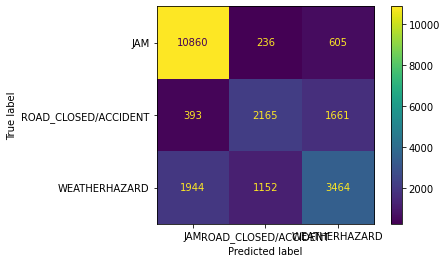



                      precision    recall  f1-score   support

                 JAM       0.82      0.93      0.87     11701
ROAD_CLOSED/ACCIDENT       0.61      0.51      0.56      4219
       WEATHERHAZARD       0.60      0.53      0.56      6560

            accuracy                           0.73     22480
           macro avg       0.68      0.66      0.66     22480
        weighted avg       0.72      0.73      0.72     22480

----------------------------------------
Decision Tree Model Evaluation


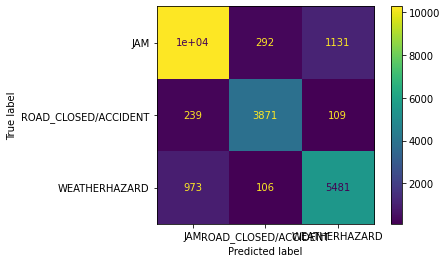



                      precision    recall  f1-score   support

                 JAM       0.89      0.88      0.89     11701
ROAD_CLOSED/ACCIDENT       0.91      0.92      0.91      4219
       WEATHERHAZARD       0.82      0.84      0.83      6560

            accuracy                           0.87     22480
           macro avg       0.87      0.88      0.87     22480
        weighted avg       0.87      0.87      0.87     22480

----------------------------------------
Random Forest Model Evaluation


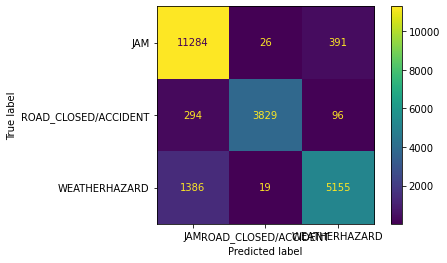



                      precision    recall  f1-score   support

                 JAM       0.87      0.96      0.91     11701
ROAD_CLOSED/ACCIDENT       0.99      0.91      0.95      4219
       WEATHERHAZARD       0.91      0.79      0.84      6560

            accuracy                           0.90     22480
           macro avg       0.92      0.89      0.90     22480
        weighted avg       0.91      0.90      0.90     22480

----------------------------------------


In [32]:
for modeling, name in zip(my_model, model_name):
  model = modeling
  model = model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  print(f"{name} Model Evaluation")
  cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot()
  plt.show()
  print('\n')
  print(classification_report(y_test, y_pred))
  print(20*'--')

# 4. Resampling with SMOTE


In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res_sm, y_res_sm = sm.fit_resample(X_train, y_train)

KNN Model Evaluation


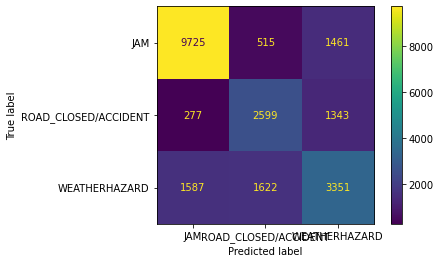



                      precision    recall  f1-score   support

                 JAM       0.84      0.83      0.84     11701
ROAD_CLOSED/ACCIDENT       0.55      0.62      0.58      4219
       WEATHERHAZARD       0.54      0.51      0.53      6560

            accuracy                           0.70     22480
           macro avg       0.64      0.65      0.65     22480
        weighted avg       0.70      0.70      0.70     22480

----------------------------------------
Decision Tree Model Evaluation


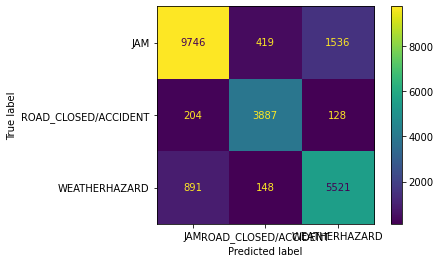



                      precision    recall  f1-score   support

                 JAM       0.90      0.83      0.86     11701
ROAD_CLOSED/ACCIDENT       0.87      0.92      0.90      4219
       WEATHERHAZARD       0.77      0.84      0.80      6560

            accuracy                           0.85     22480
           macro avg       0.85      0.87      0.85     22480
        weighted avg       0.86      0.85      0.85     22480

----------------------------------------
Random Forest Model Evaluation


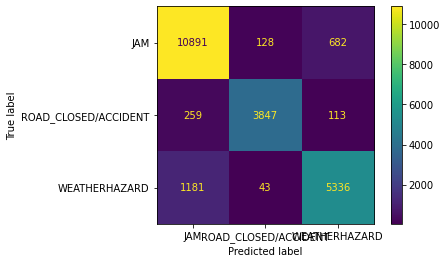



                      precision    recall  f1-score   support

                 JAM       0.88      0.93      0.91     11701
ROAD_CLOSED/ACCIDENT       0.96      0.91      0.93      4219
       WEATHERHAZARD       0.87      0.81      0.84      6560

            accuracy                           0.89     22480
           macro avg       0.90      0.89      0.89     22480
        weighted avg       0.89      0.89      0.89     22480

----------------------------------------


In [37]:
for modeling, name in zip(my_model, model_name):
  model = modeling
  model = model.fit(X_res_sm, y_res_sm)

  y_pred = model.predict(X_test)
  print(f"{name} Model Evaluation")
  cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot()
  plt.show()
  print('\n')
  print(classification_report(y_test, y_pred))
  print(20*'--')